# 1. How-To Recipes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hotstepper as hs
from itertools import chain
import hotstepper.samples as samples

HotStepper has a number of sample datasets included to get you going and up to speed on some of the possibilities.
 - Veseel queue
 - Hotel Stays
 - Page views
 - Daily temperatures

All located under the submodule:
    import hotstepper.samples as samples

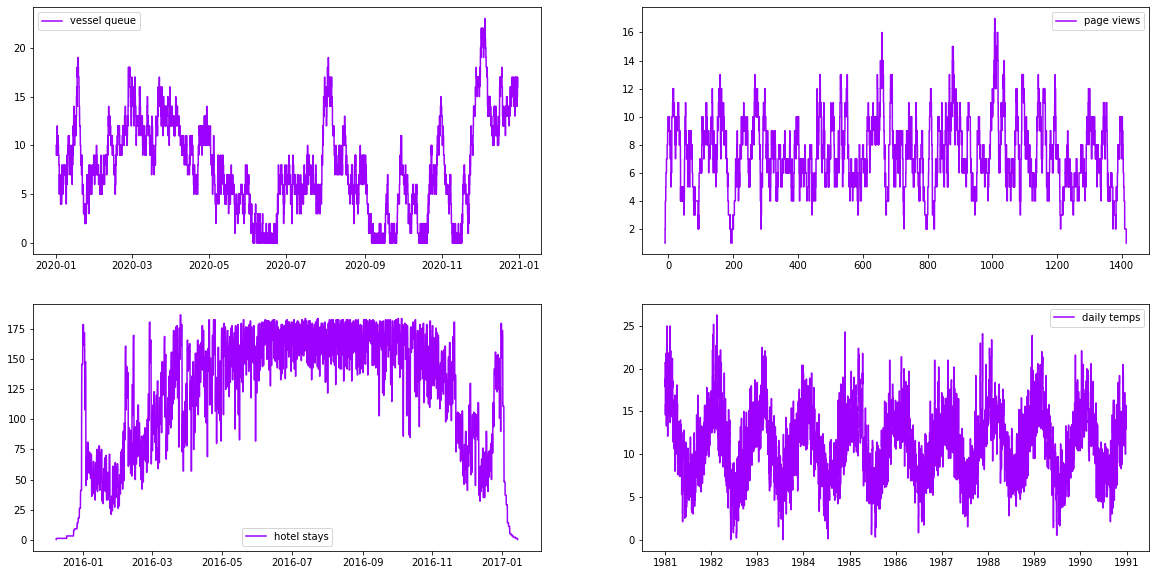

In [2]:
fig, (axr1,axr2) = plt.subplots(nrows=2,ncols=2, figsize=(20,10))

sample_steps = {}

# Get some sample data in Steps objects 
sample_steps['vessel queue'] = samples.vessel_queue_sample()
sample_steps['page views'] = samples.page_view_sample()
sample_steps['hotel stays'] = samples.hotel_stays_sample()
sample_steps['daily temps'] = samples.daily_temperature_sample()


# Let's plot each sample to see what we have
ax = chain(axr1,axr2)
for x,(k,v) in zip(ax,sample_steps.items()):
    v.plot(ax=x,label=k)
    x.legend()


## Steps Statistics

Quick facts about the dataset are only a method call away, for example, we can asked a bunch of questions about descriptive statistics.

In [3]:
print('\n',sample_steps['vessel queue'].min(),'\n',
        sample_steps['vessel queue'].max(),'\n',
        sample_steps['vessel queue'].mean(),'\n',
        sample_steps['vessel queue'].mode(),'\n',
        sample_steps['vessel queue'].median(),'\n',
        sample_steps['vessel queue'].var(),'\n',
        sample_steps['vessel queue'].std()
        )


 0.0 
 23.0 
 7.7218513022624045 
 6.0 
 7.0 
 23.431962388696526 
 4.8406572269369095


We can also get other facts that might seem obvious, but instead of going anywhere else, we can just use our steps object.

In [4]:
print('\n',sample_steps['vessel queue'].first(),'\n',
        sample_steps['vessel queue'].last(),'\n',
        sample_steps['vessel queue'].integrate(),'\n',
        sample_steps['vessel queue'].percentile(25),
        )


 2020-01-01 04:40:00 
 2020-12-30 18:11:00 
 67562.4666666666 
 5.0


now we have seen we can get the individual stats, we could just get them all at once.

In [5]:
sample_steps['vessel queue'].describe()

,Metric,Value
0,Count,2422
1,Mean,7.72
2,Median,7.0
3,Mode,6.0
4,Std,4.84
5,Var,23.43
6,Min,0.0
7,25%,5.0
8,75%,12.0
9,Max,23.0


## Special Steps Statistics

We also can directly get the raw first, last, span and weightings of each step within the steps object.

NOTE: All values are raw in the sense that they are all float values as stored internally. For example, if we use a helper function to convert the first and last values from this method into a format they are supposed to be.

The weights seem abstract, but they represent how much of the total span (think duration from the start to the end of the steps) the steps stay at that value before changing to the next value. For example, if you filter for the maximum value in the weights array, this represents the maximum time that was spent at a single step value. 



In [6]:
s,e,span,weights = sample_steps['vessel queue'].span_and_weights()

print('\nfirst timestamp',hs.utilities.get_datetime(s),
        '\nlast timestamp',hs.utilities.get_datetime(e),
        '\ntotal duration',int(span/(24*3600)),'days',
        #'\nstep value duration percentages:\n',weights,'\n'
    )

#print('percentage of total time of longest duration single step value',np.amax(weights),'\n')
print(f'longest single value duration is {np.amax(weights)*span/3600:.3} hours')

start_longest_dt = hs.utilities.get_datetime(sample_steps['vessel queue'].iloc(1+np.argmax(weights))[0])
end_longest_dt = hs.utilities.get_datetime(sample_steps['vessel queue'].iloc(2+np.argmax(weights))[0])

print('longest single value is between',start_longest_dt,' - ',end_longest_dt,'\nand a value of',sample_steps['vessel queue'](start_longest_dt)[0])


first timestamp 2020-01-01 04:40:00 
last timestamp 2020-12-30 18:11:00 
total duration 364 days
longest single value duration is 36.1 hours
longest single value is between 2020-11-14 04:25:00  -  2020-11-15 16:29:00 
and a value of 0.0


We can even have a look at what this looks like by clipping a section out of the data set

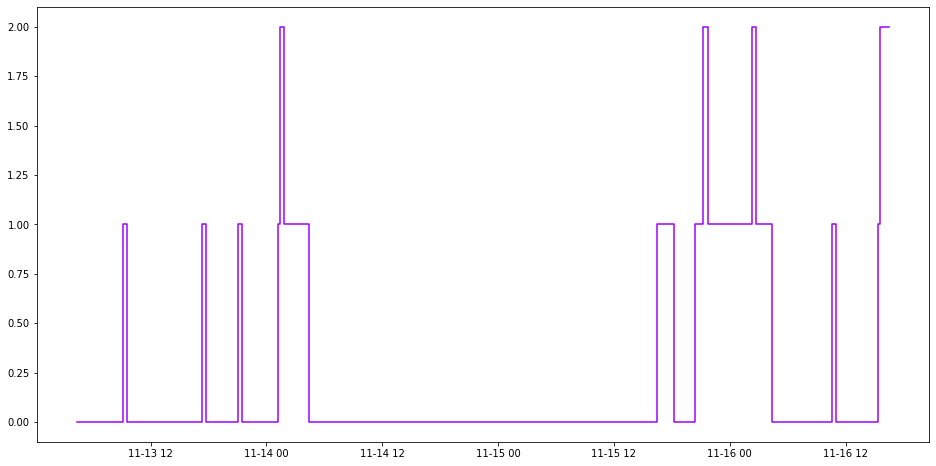

In [7]:
vessel_queue_clip = sample_steps['vessel queue'].clip(lbound=start_longest_dt-pd.Timedelta(days=1),ubound=end_longest_dt+pd.Timedelta(days=1))
vessel_queue_clip.plot();

## Correlations

What about other statistical measures, like covariance, or correlation? 
Sure,

In [8]:
#simple pass in the other steps object to the correlation or covariance method of the other steps object and presto!
#these measures are symmetric, so it doesn't matter which direction we do the call.
print(f"vessel queue parent call: correlation = {sample_steps['vessel queue'].correlation(vessel_queue_clip):.4}")
print(f"vessel queue parent call: covariance = {sample_steps['vessel queue'].covariance(vessel_queue_clip):.4}\n")

print(f"vessel queue clip call: correlation = {vessel_queue_clip.correlation(sample_steps['vessel queue']):.4}")
print(f"vessel queue clip call: covariance = {vessel_queue_clip.covariance(sample_steps['vessel queue']):.4}")


vessel queue parent call: correlation = 10.17
vessel queue parent call: covariance = 23.04

vessel queue clip call: correlation = 10.17
vessel queue clip call: covariance = 23.04


But wait there's more!

## Statistical Plots

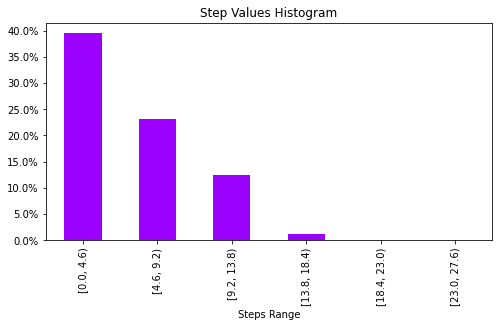

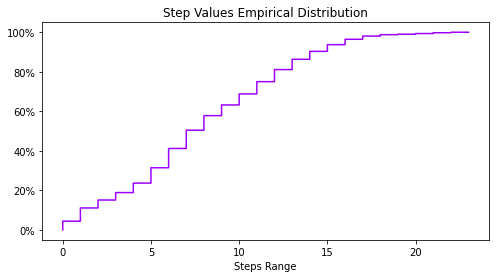

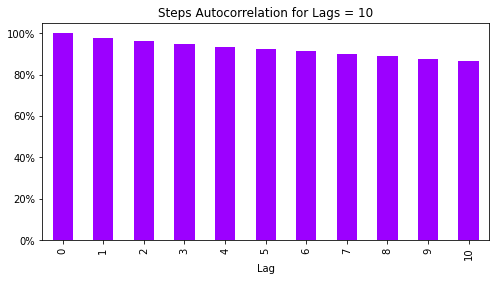

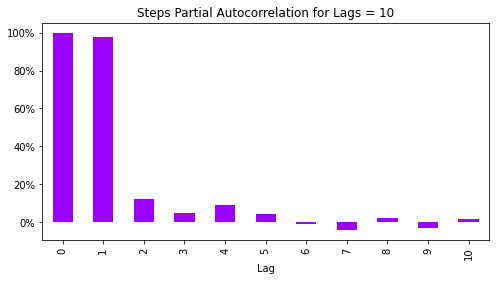

In [9]:
sample_steps['vessel queue'].histogram_plot(figsize=(8,4), bins=5)
sample_steps['vessel queue'].ecdf_plot(figsize=(8,4))
sample_steps['vessel queue'].acf_plot(figsize=(8,4))
sample_steps['vessel queue'].pacf_plot(figsize=(8,4));

ok, but we don't like some of the formatting and i already know that at lag = 0 it is 100% correlated, so can i throw that away?

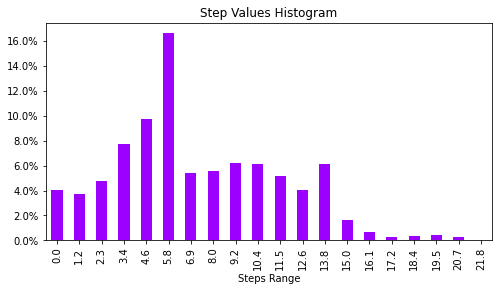

In [10]:
sample_steps['vessel queue'].histogram_plot(label_style='left',precision=1,figsize=(8,4));


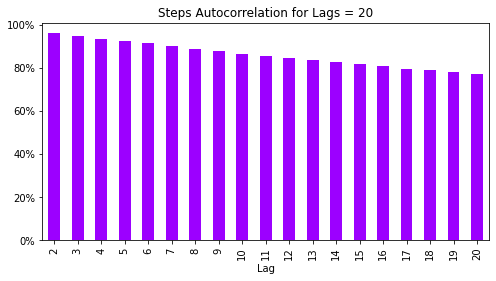

In [11]:
sample_steps['vessel queue'].acf_plot(20,2,figsize=(8,4));


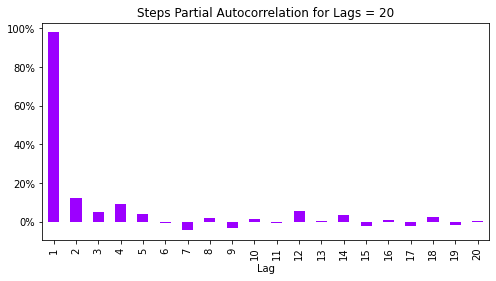

In [12]:
sample_steps['vessel queue'].pacf_plot(20,1,figsize=(8,4));


## Get A Total Summary

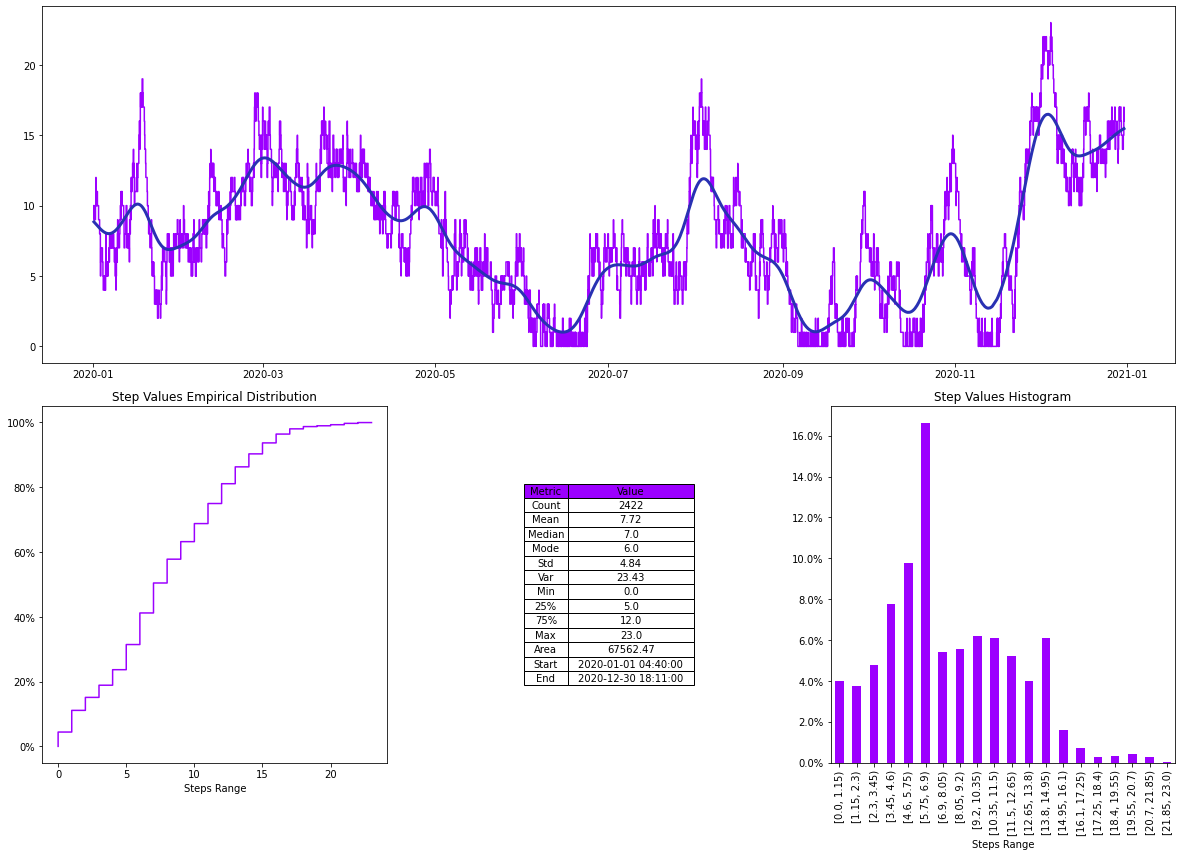

In [13]:
plot_axess = sample_steps['vessel queue'].summary()

## Fun With Plots

As with all plots in HotStepper, they are Matplotlib based, therefore all the fun and power available from Matplotlib is present in the HotStepper charts.

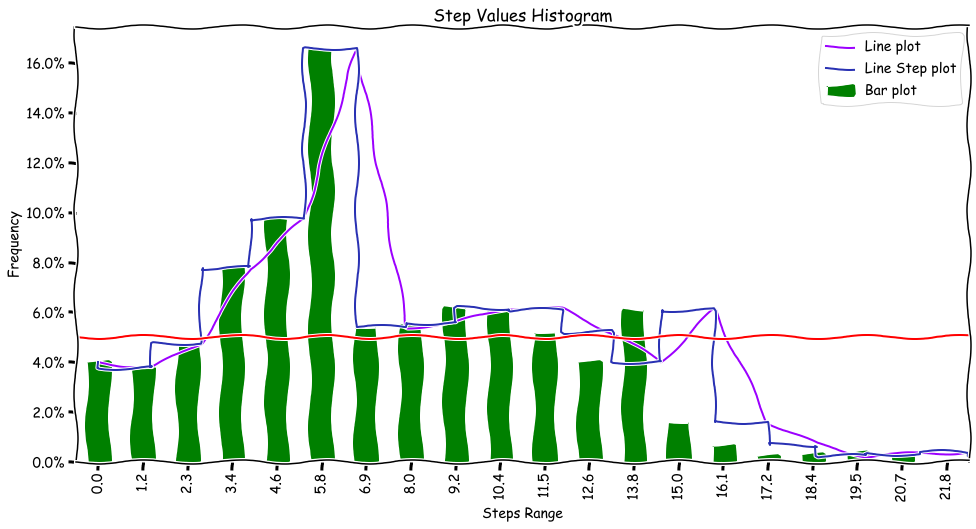

In [14]:
plt.xkcd(2)
ax = sample_steps['vessel queue'].histogram_plot(label_style='left',precision=1,kind='line',label='Line plot')
sample_steps['vessel queue'].histogram_plot(ax=ax,label_style='left',precision=1,kind='line',drawstyle='steps-pre',label='Line Step plot')
sample_steps['vessel queue'].histogram_plot(ax=ax,label_style='left',precision=1,color='g',label='Bar plot')

fig = ax.get_figure()

ax.axhline(0.05,color='r')
ax.set_ylabel('Frequency')
ax.legend();

#fig.savefig('save_chart_to_file.png')
